In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

# Бронирование отеля
## Основываясь на признаках определить, в каком отеле была забронирована комната.
### Чтение данных

In [2]:
data = pd.read_csv('hotel_booking.csv', sep=',', header=0,  engine='python')
type(data)

pandas.core.frame.DataFrame

In [3]:
data = data[:50000]
data = data.drop(['name', 'email','phone-number','credit_card'], axis='columns')
#(['name', 'email','phone-number','credit_card'], axis='columns')
data.shape

(50000, 32)

Были взяты только первые 50000 объектов. Это было сделано для лучшего быстродействия на локальном компьютере.

### Описание данных

* hotel

> The datasets contains the booking information of two hotel. One of the hotels is a resort hotel and the other is a city hotel.

> Датасет содержит информацию о бронировании номеров в двух отелях. Одни отели курортные, другие городские.

* is_canceled

> Value indicating if the booking was canceled (1) or not (0).

> Значение, указывающее, освободилась ли бронь(1) или нет(0).

* lead_time

> Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.

> Количество дней, которое прошло между датой бронирования и датой заселения.

* arrival_date_year

> Year of arrival date

> Год прибытия.

* arrival_date_month

> Month of arrival date with 12 categories: “January” to “December”

> Месяц прибытия, разделенный на 12 категорий: от "Январь" до "Декабрь"

* arrival_date_week_number

> Day of the week of the arrival date

> Номер недели прибытия

* arrival_date_day_of_month

> Day of the month of the arrival date

> Номер месяца прибытия

* stays_in_weekend_nights

> Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

> Количество ночей выходного дня (суббота или воскресенье), которые гость провел или забронировал для проживания в отеле

* stays_in_week_nights

> Количество ночей в неделю (с понедельника по пятницу), которые гость провел или забронировал для проживания в отеле BO и BL. 

> Рассчитывается путем подсчета количества ночей в неделю

* adults

> Number of adults

> Число взрослых.

* children

> Number of children

> Число детей

* babies

> Number of babies

> Число младенцев

* meal

> BB – Bed & Breakfast

> Постель и завтрак

* country

> Country of origin.

> На территории какой страны располагается отель

* market_segment

> Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

> Обозначение сегмента рынка. В категориях термин “TA” означает “Туристические агенты”, а “TO” означает “Туроператоры”.

* distribution_channel

> Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

> Канал распространения бронирования. Термин “TA” означает “Туристические агенты”, а “TO” означает “Туроператоры”.

* is_repeated_guest

> Value indicating if the booking name was from a repeated guest (1) or not (0)

> Значение, указывающее, было ли имя при бронировании от повторного гостя (1) или нет (0)

* previous_cancellations

> Number of previous bookings that were cancelled by the customer prior to the current booking

> Количество предыдущих бронирований, которые были отменены клиентом до текущего бронирования

* previous_bookings_not_canceled

> Number of previous bookings not cancelled by the customer prior to the current booking

> Количество предыдущих бронирований, не отмененных клиентом до текущего бронирования

* reserved_room_type

> Code of room type reserved. Code is presented instead of designation for anonymity reasons

> Код забронированного типа номера. Код представлен вместо обозначения по соображениям анонимности

* assigned_room_type

> Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons

> Код для типа номера, присвоенного при бронировании. Иногда назначенный тип номера отличается от забронированного типа номера по причинам работы отеля (например, овербукинг) или по запросу клиента. Код представлен вместо обозначения по соображениям анонимности

* booking_changes

> Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

> Количество изменений/дополнении, внесенных в бронирование с момента ввода бронирования в PMS до момента регистрации заезда или отмены

* deposit_type

> No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

> Без депозита – депозит не был внесен; Невозврат – депозит был внесен в размере общей стоимости проживания; Возвращаемый – депозит был внесен на сумму, меньшую общей стоимости проживания.

* agent

> ID of the travel agency that made the booking

> Идентификационный номер туристического агентства, оформившего бронирование

* company

> ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

> Идентификационный номер компании/юридического лица, сделавшего бронирование или ответственного за оплату бронирования. Идентификатор предоставляется вместо обозначения по соображениям анонимности

* days_in_waiting_list

> Number of days the booking was in the waiting list before it was confirmed to the customer

> Количество дней, в течение которых бронирование находилось в списке ожидания, прежде чем оно было подтверждено клиенту

* customer_type

> Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

> Группа – когда бронирование связано с группой; Временное – когда бронирование не является частью группы или контракта и не связано с другим временным бронированием; Переходная сторона - когда бронирование временное, но связано по крайней мере с другим временным бронированием

* adr

> Average Daily Rate (Calculated by dividing the sum of all lodging transactions by the total number of staying nights)

> Средняя дневная ставка (рассчитывается путем деления суммы всех сделок по размещению на общее количество ночей проживания)

* required_car_parking_spaces

> Number of car parking spaces required by the customer

> Количество парковочных мест, требуемое заказчиком

* total_of_special_requests

> Number of special requests made by the customer (e.g. twin bed or high floor)

> Количество специальных запросов, сделанных заказчиком (например, двуспальная кровать или высокий этаж)

* reservation_status

> Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

> Выезд – клиент зарегистрировался, но уже выехал; Неявка - клиент не зарегистрировался и не сообщил отелю причину, по которой

* reservation_status_date

> Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

> Дата, на которую был установлен последний статус. Эта переменная может использоваться в сочетании со статусом бронирования, чтобы понять, когда было отменено бронирование или когда клиент выписался из отеля

* name

> Name of the Guest (Not Real)

> Имя Гостя (Ненастоящее)

* email

> Email (Not Real)

* phone-number

> Phone number (not real)

> Номер телефона (ненастоящий)

* credit_card

> Credit Card Number (not Real)

> Номер кредитной карты (ненастоящий)

In [4]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,City Hotel,1,168,2016,April,17,22,1,2,2,...,Non Refund,26.0,NaN,77,Transient,85.0,0,0,Canceled,2016-01-22
49996,City Hotel,1,61,2016,April,17,22,1,2,2,...,No Deposit,9.0,NaN,0,Transient,118.8,0,0,Canceled,2016-04-10
49997,City Hotel,1,168,2016,April,17,22,1,2,2,...,Non Refund,26.0,NaN,77,Transient,85.0,0,0,Canceled,2016-01-22
49998,City Hotel,1,168,2016,April,17,22,1,2,2,...,Non Refund,26.0,NaN,77,Transient,85.0,0,0,Canceled,2016-01-22


## Визуализация данных

In [5]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,49996.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,41177.000000,3331.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.32044,88.152320,2015.970080,27.449720,15.809120,1.115580,2.942500,1.855860,0.115409,0.012160,0.035560,0.081500,0.117340,0.263580,171.756442,229.004503,1.939360,93.773859,0.113420,0.564220
std,0.46665,91.850052,0.745785,14.066907,8.805525,1.117679,2.336703,0.657368,0.424523,0.119048,0.185192,1.195745,0.898748,0.698481,115.447886,130.658939,13.696735,61.546054,0.322363,0.792318
min,0.00000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.00000,12.000000,2015.000000,15.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,123.000000,0.000000,55.600000,0.000000,0.000000
50%,0.00000,58.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,223.000000,0.000000,78.300000,0.000000,0.000000
75%,1.00000,139.000000,2017.000000,39.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,308.000000,0.000000,116.750000,0.000000,1.000000
max,1.00000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,30.000000,20.000000,535.000000,543.000000,224.000000,5400.000000,8.000000,5.000000


### Диаграмма разброса

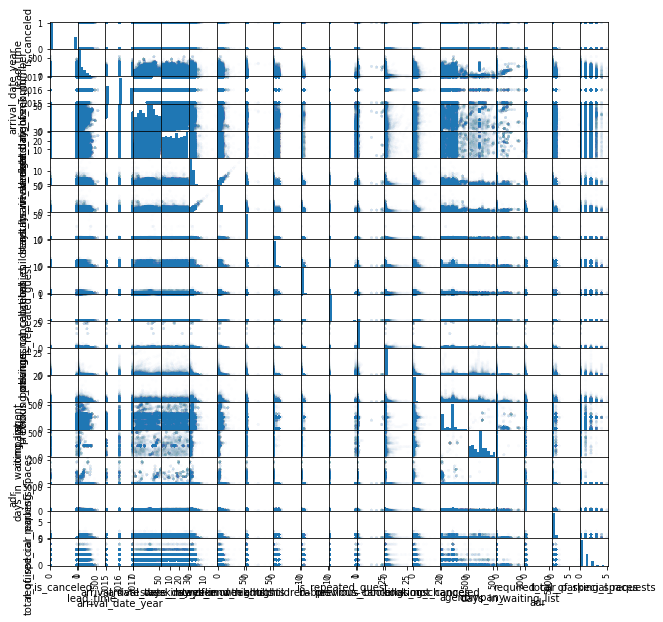

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

### Матрица корреляции

In [7]:
corr_mat = data.corr()
corr_mat

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.190388,0.011056,-0.046334,0.004981,0.048439,0.038945,0.066399,0.054058,-0.029459,-0.106168,0.091766,-0.077780,-0.131133,-0.098198,-0.040101,0.017957,0.091402,-0.241606,-0.141343
lead_time,0.190388,1.000000,0.097897,0.103337,-0.013089,0.292562,0.363334,0.127963,-0.005576,0.000555,-0.132148,0.092380,-0.096031,0.071215,0.050447,0.039947,0.119917,0.020553,-0.128301,-0.016612
arrival_date_year,0.011056,0.097897,1.000000,-0.552866,0.004082,0.074380,0.084446,-0.003493,0.078859,-0.001083,0.101396,-0.076211,0.077658,0.058180,0.389739,0.264130,-0.083282,0.115985,0.052633,0.101071
arrival_date_week_number,-0.046334,0.103337,-0.552866,1.000000,0.076806,0.021728,0.020927,0.042830,0.000738,0.011544,-0.073677,0.036976,-0.048685,0.003622,-0.058035,-0.079716,0.045800,0.125468,0.000029,0.038312
arrival_date_day_of_month,0.004981,-0.013089,0.004082,0.076806,1.000000,-0.035332,-0.040968,0.001366,0.013768,-0.002804,0.002237,-0.039408,0.004455,0.006795,0.014413,0.094351,0.046939,0.042242,0.011178,0.005641
stays_in_weekend_nights,0.048439,0.292562,0.074380,0.021728,-0.035332,1.000000,0.667883,0.093914,0.043459,0.015742,-0.096675,-0.001317,-0.081018,0.061532,0.072746,0.089846,-0.063131,0.087891,-0.062752,0.075781
stays_in_week_nights,0.038945,0.363334,0.084446,0.020927,-0.040968,0.667883,1.000000,0.089849,0.041546,0.017252,-0.107077,-0.000413,-0.075071,0.096229,0.094139,0.070579,0.002398,0.108184,-0.071023,0.082783
adults,0.066399,0.127963,-0.003493,0.042830,0.001366,0.093914,0.089849,1.000000,0.062920,0.022653,-0.114956,0.007185,-0.123810,-0.022144,0.041785,0.175015,-0.012768,0.188793,0.019388,0.086950
children,0.054058,-0.005576,0.078859,0.000738,0.013768,0.043459,0.041546,0.062920,1.000000,0.021304,-0.034396,-0.016718,-0.030044,0.052345,0.093551,0.048874,-0.037780,0.320509,0.054445,0.048987
babies,-0.029459,0.000555,-0.001083,0.011544,-0.002804,0.015742,0.017252,0.022653,0.021304,1.000000,-0.015985,-0.006681,-0.013149,0.089173,0.020356,0.039103,-0.014120,0.044154,0.036502,0.125518


### Разнородность классов

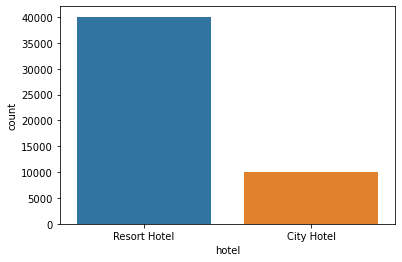

In [8]:
sns.countplot(x='hotel', data=data)
pass

### Визуализация матрицы корреляции

<AxesSubplot:>

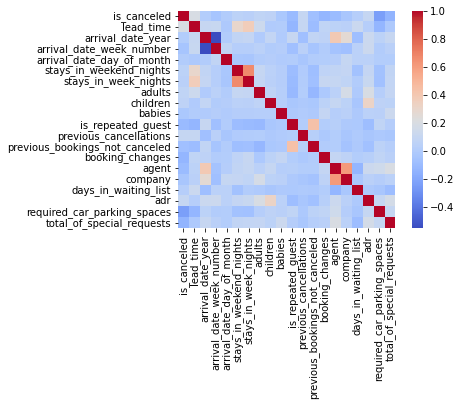

In [9]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')

Можно увидеть, что признаки практически не коррелируют между собой и большей степени являются независимыми.

## Обработка пропущенных значений

In [10]:
data.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             478
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              8823
company                           46669


### Находим категориальные признаки

In [11]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)
data.shape

['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


(50000, 32)

In [12]:
data.dropna(axis = 0).shape

(182, 32)

Есть пропущенные значения. Заполняем медианными значениями

In [13]:
data = data.fillna(data.median(axis = 0, numeric_only=True), axis = 0)
data.shape

(50000, 32)

### Векторизируем данные

In [14]:
data_describe = data.describe(include = [object])

Векторизация бинарных данных

In [15]:
data.at[data['hotel'] == 'City Hotel', 'hotel'] = 0
data.at[data['hotel'] == 'Resort Hotel', 'hotel'] = 1
data['hotel'].describe()

#data.at[data['Residence_type'] == 'Urban', 'Residence_type'] = 0
#data.at[data['Residence_type'] == 'Rural', 'Residence_type'] = 1
#data['Residence_type'].describe()

for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])
data.describe(include = [object])

binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]

data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['arrival_date_month_April', 'arrival_date_month_August',
       'arrival_date_month_December', 'arrival_date_month_February',
       'arrival_date_month_January', 'arrival_date_month_July',
       'arrival_date_month_June', 'arrival_date_month_March',
       'arrival_date_month_May', 'arrival_date_month_November',
       ...
       'reservation_status_date_2017-09-03',
       'reservation_status_date_2017-09-04',
       'reservation_status_date_2017-09-05',
       'reservation_status_date_2017-09-06',
       'reservation_status_date_2017-09-07',
       'reservation_status_date_2017-09-08',
       'reservation_status_date_2017-09-09',
       'reservation_status_date_2017-09-10',
       'reservation_status_date_2017-09-12',
       'reservation_status_date_2017-09-14'],
      dtype='object', length=1117)


### Нормализация 

In [16]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.32044,88.152320,2015.970080,27.449720,15.809120,1.115580,2.942500,1.855860,0.115400,0.012160,0.035560,0.081500,0.117340,0.263580,183.798700,223.400020,1.939360,93.773859,0.113420,0.564220
std,0.46665,91.850052,0.745785,14.066907,8.805525,1.117679,2.336703,0.657368,0.424507,0.119048,0.185192,1.195745,0.898748,0.698481,107.949408,33.752686,13.696735,61.546054,0.322363,0.792318
min,0.00000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.00000,12.000000,2015.000000,15.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,223.000000,0.000000,55.600000,0.000000,0.000000
50%,0.00000,58.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,223.000000,0.000000,78.300000,0.000000,0.000000
75%,1.00000,139.000000,2017.000000,39.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,223.000000,0.000000,116.750000,0.000000,1.000000
max,1.00000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,30.000000,20.000000,535.000000,543.000000,224.000000,5400.000000,8.000000,5.000000


In [17]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,-2.489293e-14,-7.468719e-15,-8.020734e-14,-2.237308e-15,-7.300960e-16,-4.159489e-15,2.070182e-14,2.740378e-14,1.666768e-14,-3.608439e-15,-5.064421e-15,2.081658e-14,3.190026e-14,-4.390788e-15,-1.402011e-13,7.985494e-15,3.072731e-14,-2.296119e-16,-1.891728e-14,-1.630121e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-6.866811e-01,-9.597416e-01,-1.300749e+00,-1.880280e+00,-1.681799e+00,-9.981220e-01,-1.259253e+00,-2.823169e+00,-2.718446e-01,-1.021437e-01,-1.920167e-01,-6.815834e-02,-1.305594e-01,-3.773619e-01,-1.693374e+00,-6.440970e+00,-1.415929e-01,-1.627299e+00,-3.518393e-01,-7.121128e-01
25%,-6.866811e-01,-8.290939e-01,-1.300749e+00,-8.850361e-01,-8.868432e-01,-9.981220e-01,-8.312993e-01,2.192685e-01,-2.718446e-01,-1.021437e-01,-1.920167e-01,-6.815834e-02,-1.305594e-01,-3.773619e-01,-1.072713e+00,-1.185150e-02,-1.415929e-01,-6.202487e-01,-3.518393e-01,-7.121128e-01
50%,-6.866811e-01,-3.282777e-01,4.011878e-02,1.102076e-01,2.167730e-02,-1.034107e-01,-4.033460e-01,2.192685e-01,-2.718446e-01,-1.021437e-01,-1.920167e-01,-6.815834e-02,-1.305594e-01,-3.773619e-01,5.206263e-01,-1.185150e-02,-1.415929e-01,-2.514192e-01,-3.518393e-01,-7.121128e-01
75%,1.456251e+00,5.535945e-01,1.380987e+00,8.210959e-01,8.166327e-01,7.913006e-01,4.525606e-01,2.192685e-01,-2.718446e-01,-1.021437e-01,-1.920167e-01,-6.815834e-02,-1.305594e-01,-3.773619e-01,5.206263e-01,-1.185150e-02,-1.415929e-01,3.733162e-01,-3.518393e-01,5.500062e-01
max,1.456251e+00,7.064206e+00,1.380987e+00,1.816340e+00,1.725153e+00,1.600139e+01,2.013841e+01,8.084386e+01,2.328488e+01,8.389761e+01,5.207777e+00,2.167561e+01,3.324922e+01,2.825621e+01,3.253388e+00,9.468876e+00,1.621267e+01,8.621554e+01,2.446490e+01,5.598482e+00


### Соединяем все в матрицу

In [18]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(50000, 1138)


In [19]:
data.isna().sum()

is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_week_number              0
arrival_date_day_of_month             0
                                     ..
reservation_status_date_2017-09-09    0
reservation_status_date_2017-09-10    0
reservation_status_date_2017-09-12    0
reservation_status_date_2017-09-14    0
hotel                                 0
Length: 1138, dtype: int64

Видно, что пропусков не осталось

In [20]:
data

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reservation_status_date_2017-09-04,reservation_status_date_2017-09-05,reservation_status_date_2017-09-06,reservation_status_date_2017-09-07,reservation_status_date_2017-09-08,reservation_status_date_2017-09-09,reservation_status_date_2017-09-10,reservation_status_date_2017-09-12,reservation_status_date_2017-09-14,hotel
0,-0.686681,2.763718,-1.300749,-0.031970,-1.681799,-0.998122,-1.259253,0.219268,-0.271845,-0.102144,...,0,0,0,0,0,0,0,0,0,1
1,-0.686681,7.064206,-1.300749,-0.031970,-1.681799,-0.998122,-1.259253,0.219268,-0.271845,-0.102144,...,0,0,0,0,0,0,0,0,0,1
2,-0.686681,-0.883530,-1.300749,-0.031970,-1.681799,-0.998122,-0.831299,-1.301950,-0.271845,-0.102144,...,0,0,0,0,0,0,0,0,0,1
3,-0.686681,-0.818207,-1.300749,-0.031970,-1.681799,-0.998122,-0.831299,-1.301950,-0.271845,-0.102144,...,0,0,0,0,0,0,0,0,0,1
4,-0.686681,-0.807319,-1.300749,-0.031970,-1.681799,-0.998122,-0.403346,0.219268,-0.271845,-0.102144,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.456251,0.869326,0.040119,-0.742858,0.703068,-0.103411,-0.403346,0.219268,-0.271845,-0.102144,...,0,0,0,0,0,0,0,0,0,0
49996,1.456251,-0.295616,0.040119,-0.742858,0.703068,-0.103411,-0.403346,0.219268,-0.271845,-0.102144,...,0,0,0,0,0,0,0,0,0,0
49997,1.456251,0.869326,0.040119,-0.742858,0.703068,-0.103411,-0.403346,0.219268,-0.271845,-0.102144,...,0,0,0,0,0,0,0,0,0,0
49998,1.456251,0.869326,0.040119,-0.742858,0.703068,-0.103411,-0.403346,0.219268,-0.271845,-0.102144,...,0,0,0,0,0,0,0,0,0,0


## Разбиение данных на обучающую и тестовую выборки

In [21]:
X = data.drop('hotel', axis = 1) # выбрасываем столбец 'class'
y = data['hotel']
X = X.to_numpy()
y = y.to_numpy(dtype='int32')



In [22]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

print(N_train, N_test)

35000 15000


## Классификатор ближайших соседей

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

In [26]:
err_test

0.008733333333333333

In [27]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[ 2892    65]
 [   66 11977]]


### Подбираем параметры для уменьшения ошибки

In [28]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print("best_cv_err: ", best_cv_err)
print("best_n_neighbors: ", best_n_neighbors)

best_cv_err:  0.009685714285714297
best_n_neighbors:  3


In [29]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print("err_train: ", err_train)
print("err_test: ", err_test)

err_train:  0.005057142857142857
err_test:  0.008133333333333333


## Выводы

В ходе данной лабораторной работы были рассмотрены визуализация данных и вычисление основных характеристик, обработка пропущенные значений, векторизация категориальных признаков, нормализация и разбиение на обучающую и тестовую выборки. Для решения задачи классификации использовался метод ближайших соседей(kNN). Минимальная ошибка получилась при использовании 3 ближайших соседей. При таком наборе признаков задача классификации решается с малой ошибкой методом kNN.

# Обучаем классификатор

## 1 скрытый слой

In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
mlp_model = MLPClassifier(hidden_layer_sizes = (50,),
                          solver = 'adam', 
                          activation = 'logistic',
                          max_iter=2000,
                          random_state = 42,
                          verbose=1,
                          tol=1e-4)

In [32]:
%%time
mlp_model.fit(X_train, y_train)

Iteration 1, loss = 0.41422916
Iteration 2, loss = 0.21769443
Iteration 3, loss = 0.13229809
Iteration 4, loss = 0.09174742
Iteration 5, loss = 0.07124202
Iteration 6, loss = 0.05982832
Iteration 7, loss = 0.05284371
Iteration 8, loss = 0.04830992
Iteration 9, loss = 0.04509754
Iteration 10, loss = 0.04281409
Iteration 11, loss = 0.04112147
Iteration 12, loss = 0.03966346
Iteration 13, loss = 0.03857134
Iteration 14, loss = 0.03765096
Iteration 15, loss = 0.03685286
Iteration 16, loss = 0.03627722
Iteration 17, loss = 0.03573297
Iteration 18, loss = 0.03528660
Iteration 19, loss = 0.03508091
Iteration 20, loss = 0.03458837
Iteration 21, loss = 0.03433428
Iteration 22, loss = 0.03386382
Iteration 23, loss = 0.03352265
Iteration 24, loss = 0.03327960
Iteration 25, loss = 0.03302724
Iteration 26, loss = 0.03288719
Iteration 27, loss = 0.03267900
Iteration 28, loss = 0.03244777
Iteration 29, loss = 0.03225871
Iteration 30, loss = 0.03210111
Iteration 31, loss = 0.03192733
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(50,), max_iter=2000,
              random_state=42, verbose=1)

Ошибки на тестовой выборке

In [33]:
y_test_pred = mlp_model.predict(X_test)
err_test  = np.mean(y_test  != y_test_pred)
err_test

0.0048

Ошибки на тренировочной выборке

In [34]:
y_train_pred = mlp_model.predict(X_train)
err_train  = np.mean(y_train  != y_train_pred)
err_train

0.00031428571428571427

## 2 скрытых слоя

In [35]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (50, 12),
                          solver = 'adam', 
                          activation = 'logistic',
                          max_iter=2000,
                          random_state = 42,
                          verbose=1,
                          tol=1e-4)

In [36]:
%%time
mlp_model.fit(X_train, y_train)

Iteration 1, loss = 0.48717242
Iteration 2, loss = 0.27933690
Iteration 3, loss = 0.13670504
Iteration 4, loss = 0.08938494
Iteration 5, loss = 0.06941780
Iteration 6, loss = 0.05887337
Iteration 7, loss = 0.05238312
Iteration 8, loss = 0.04832043
Iteration 9, loss = 0.04506990
Iteration 10, loss = 0.04272625
Iteration 11, loss = 0.04102715
Iteration 12, loss = 0.03986411
Iteration 13, loss = 0.03834578
Iteration 14, loss = 0.03726663
Iteration 15, loss = 0.03637485
Iteration 16, loss = 0.03566800
Iteration 17, loss = 0.03501668
Iteration 18, loss = 0.03457892
Iteration 19, loss = 0.03368531
Iteration 20, loss = 0.03324533
Iteration 21, loss = 0.03251274
Iteration 22, loss = 0.03194719
Iteration 23, loss = 0.03154856
Iteration 24, loss = 0.03090418
Iteration 25, loss = 0.03022133
Iteration 26, loss = 0.02944885
Iteration 27, loss = 0.02873478
Iteration 28, loss = 0.02812068
Iteration 29, loss = 0.02723675
Iteration 30, loss = 0.02659292
Iteration 31, loss = 0.02571567
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 12), max_iter=2000,
              random_state=42, verbose=1)

Ошибки на тестовой выборке

In [37]:
y_test_predict = mlp_model.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.0051333333333333335

Ошибки на тренировочной выборке

In [38]:
y_train_predict = mlp_model.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)
err_train

0.00011428571428571428

## Подберем оптимальное значение параметра регуляризации alpha

### 1 скрытый слой

In [39]:
from sklearn.metrics import accuracy_score
import tqdm
alpha_arr = np.logspace(-10, 10, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in tqdm.tqdm_notebook(alpha_arr):
    mlp_model = MLPClassifier(alpha=alpha,
                              hidden_layer_sizes = (50,),
                              solver = 'adam', 
                              activation = 'logistic',
                              max_iter=2000,
                              random_state = 42,
                              #verbose=1,
                              tol=1e-4)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

C:\TEMP/ipykernel_280/3799792417.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for alpha in tqdm.tqdm_notebook(alpha_arr):


  0%|          | 0/21 [00:00<?, ?it/s]

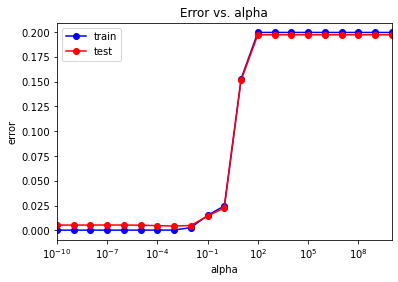

In [40]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

### Рассмотрим как менялась метрика в зависимости от гиперпараметра:

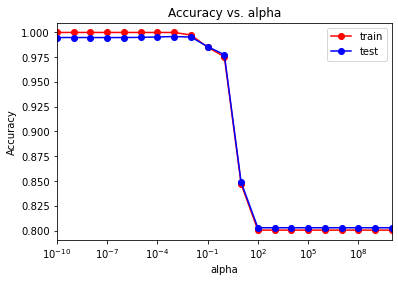

In [41]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Минимальное значение ошибки:

In [42]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.00028571428571428574 0.0044


Оптимальное значение alpha:

In [43]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.001]


In [44]:
alpha_opt = alpha_opt[0]

### Подбор числа нейронов (1 скрытый слой)

In [45]:
from sklearn.metrics import accuracy_score
import tqdm
neurons_count_arr = np.array([i for i in range(2, 100+1)])
test_err = []
train_err = []
train_acc = []
test_acc = []

for neurons_count in tqdm.tqdm_notebook(neurons_count_arr):
    mlp_model = MLPClassifier(alpha=alpha_opt,
                              hidden_layer_sizes = (neurons_count,),
                              solver = 'adam', 
                              activation = 'logistic',
                              max_iter=2000,
                              random_state = 42,
                              #verbose=1,
                              tol=1e-3)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

C:\TEMP/ipykernel_280/1571838247.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for neurons_count in tqdm.tqdm_notebook(neurons_count_arr):


  0%|          | 0/99 [00:00<?, ?it/s]

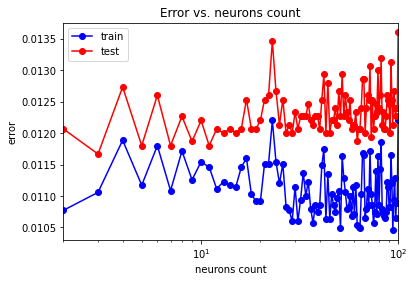

In [46]:
plt.semilogx(neurons_count_arr, train_err, 'b-o', label = 'train')
plt.semilogx(neurons_count_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(neurons_count_arr), np.max(neurons_count_arr)])
plt.title('Error vs. neurons count')
plt.xlabel('neurons count')
plt.ylabel('error')
plt.legend()

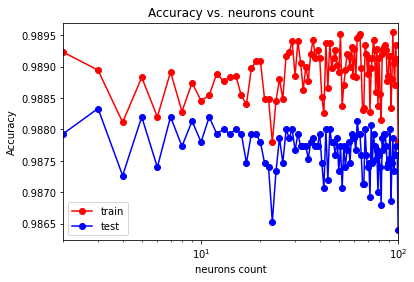

In [47]:
plt.semilogx(neurons_count_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(neurons_count_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(neurons_count_arr), np.max(neurons_count_arr)])
plt.title('Accuracy vs. neurons count')
plt.xlabel('neurons count')
plt.ylabel('Accuracy')
plt.legend()

In [48]:
max_accuracy = max(test_acc)
id_of_maximum = 0
for i in range(len(test_acc)):
    if test_acc[i] == max_accuracy:
        id_of_maximum = i
neurons = neurons_count_arr[id_of_maximum]
neurons

3

## Финальное обучение с оптимальными параметрами (по точности и времени)

In [49]:

from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (neurons,),
                          alpha=alpha_opt,
                          solver = 'adam', 
                          activation = 'logistic',
                          max_iter=2000,
                          random_state = 42,
                          #verbose=1,
                          tol=1e-4)

In [50]:

%%time
mlp_model.fit(X_train, y_train)

Wall time: 1min 16s


MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=(3,),
              max_iter=2000, random_state=42)

Ошибки на тестовой выборке

In [51]:
y_test_predict = mlp_model.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.0064

Ошибки на тренировочной выборке

In [52]:
y_train_predict = mlp_model.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)
err_train

0.0024857142857142855

In [53]:
1-err_test, 1-err_train

(0.9936, 0.9975142857142857)

# Матрица рассогласования:

In [54]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))
y_test_pred

[[ 2876   123]
 [   81 11920]]


array([1, 1, 1, ..., 1, 0, 1])

In [55]:
y_test

array([1, 1, 1, ..., 1, 0, 1])

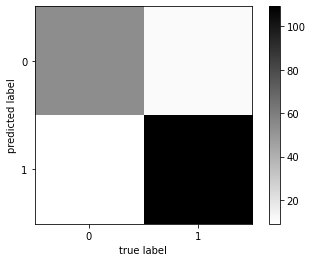

In [56]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

# Метрики качества:

In [57]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2957
           1       0.99      0.99      0.99     12043

    accuracy                           0.99     15000
   macro avg       0.98      0.98      0.98     15000
weighted avg       0.99      0.99      0.99     15000



# Вывод

Была получена полносвязная нейронная сеть. Были найдены оптимальные параметры по точности и времени обучения: 1 слой с 100 нейронами. Ошибка составляет ~20%. Данный результат объясняется малым количеством входных данных. Переобучение, недообучение не наблюдается.